In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM


Using TensorFlow backend.


In [0]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
  
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [0]:
! pip install uproot
import pandas

In [0]:
#we are wondering whether it is theoretically feasible to use the pt of the jet

#with the highest pt as an observale

#one possible issue is: say we have done the ordering of the gen Jets (before entering the detector)

#what we measure are rec jets instead of genjets (MC)

#1.a. we want to order the gen jets in highest pt (from highest to lowest)

#1.b. matching the genjets and recjets

#2. want to find probability of order of gen jets and recjets are flipped

file_dir = '/content/drive/My Drive/Pythia16Flat.root'
import uproot

#from concurrent.futures import ThreadPoolExecutor
%pylab inline
#executor = ThreadPoolExecutor(max_workers=4)

t = uproot.open(file_dir)["inclusive_jets"]

num_gen, genpt, geneta, genphi, genmass = t.arrays(['genJets', 'genJets.p4.fPt', 'genJets.p4.fEta', 'genJets.p4.fPhi', 'genJets.p4.fM'], outputtype = pandas.DataFrame)

num_rec, recpt, receta, recphi, recmass = t.arrays(['recJets', 'recJets.p4.fPt', 'recJets.p4.fEta', 'recJets.p4.fPhi', 'recJets.p4.fM'], outputtype = pandas.DataFrame)



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['var', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
#we are wondering whether it is theoretically feasible to use the pt of the jet

#with the highest pt as an observale

#one possible issue is: say we have done the ordering of the gen Jets (before entering the detector)

#what we measure are rec jets instead of genjets (MC)

#1.a. we want to order the gen jets in highest pt (from highest to lowest)

#1.b. matching the genjets and recjets

#2. want to find probability of order of gen jets and recjets are flipped
file_dir = '/content/drive/My Drive/Pythia16Flat.root'
#file_dir = '/content/drive/My Drive/Pythia16Flat.root'
import uproot

from concurrent.futures import ThreadPoolExecutor
%pylab inline
executor = ThreadPoolExecutor(max_workers=4)

t = uproot.open(file_dir)["inclusive_jets"]

num_gen, genpt, geneta, genphi, genmass = t.arrays(['genJets', 'genJets.p4.fPt', 'genJets.p4.fEta', 'genJets.p4.fPhi', 'genJets.p4.fM'], outputtype = tuple)

num_rec, recpt, receta, recphi, recmass = t.arrays(['recJets', 'recJets.p4.fPt', 'recJets.p4.fEta', 'recJets.p4.fPhi', 'recJets.p4.fM'], outputtype = tuple)

genpt

Populating the interactive namespace from numpy and matplotlib


<JaggedArray [[] [75.975876] [118.32144 51.27604 45.145573] ... [190.96977 160.87369 114.55686 102.6486 45.849796] [812.20856 788.83105 655.04095 444.3453 110.9356 88.016174] [203.53789 203.07913]] at 0x7fd717178f98>

In [0]:
pd_df = t.arrays(['genJets', 'genJets.p4.fPt', 'genJets.p4.fEta', 'genJets.p4.fPhi', 'genJets.p4.fM'], outputtype = pandas.DataFrame, entrystop=1000)
pd_df

,genJets,genJets.p4.fPt,genJets.p4.fEta,genJets.p4.fPhi,genJets.p4.fM
entry,,,,,
0,0,[],[],[],[]
1,1,[75.975876],[-3.18446],[0.710166],[11.440314]
2,3,"[118.32144, 51.27604, 45.145573]","[0.41222665, -1.4611965, 1.9651763]","[0.5277746, -2.5486567, -2.5018697]","[16.55055, 7.9144645, 4.2738423]"
3,2,"[149.29053, 141.07996]","[1.5317056, -1.0702163]","[-1.3166506, 1.5991004]","[15.416561, 13.985427]"
4,2,"[234.39307, 215.417]","[-0.5607348, -0.6397637]","[1.4271187, -1.6626452]","[13.699139, 16.328001]"
...,...,...,...,...,...
995,4,"[551.3573, 347.50897, 164.6398, 102.88105]","[0.72279876, -1.1968787, -0.10299682, 0.84912]","[1.2940445, -1.9031208, -2.400662, -0.62335455]","[51.02336, 31.894371, 31.014843, 18.081715]"
996,5,"[402.2041, 191.12672, 157.87662, 73.88794, 72....","[-0.4413118, -1.5918975, -0.8685182, 0.6492929...","[-3.120608, -0.18415366, -0.6264001, 0.6478126...","[16.553253, 21.386919, 26.923737, 9.327499, 9...."
997,1,[64.92126],[-0.045145154],[2.504577],[10.345054]


In [0]:
pd_df.loc[genJets.p4.fPt]

NameError: ignored

In [0]:
#ind = 20000
ind = len(genpt)//4
tinypt_g = genpt[:ind]
tinypt_r = recpt[:ind]
tinyphi_g = genphi[:ind]
tinyphi_r = recphi[:ind]
tinyeta_g = geneta[:ind]
tinyeta_r = receta[:ind]

tinym_r = recmass[:ind]
tinym_g = genmass[:ind]

# tinyflavor_g = genflavour[:ind]
# tinyflavor_r = genflavour[:ind]

# tiny_nCHadrons_g =  gen_nCHadrons[:ind]
# tiny_nCHadrons_r = rec_nCHadrons[:ind]

# tiny_nBHadrons_g = gen_nBHadrons[:ind]
# tiny_nBHadrons_r = rec_nBHadrons[:ind]
# import numpy as np


In [0]:
import numpy as np
x = np.random.rand(1000)

#draw random samples from data to estrimate uncertainty of distribution (bootstrapping)


495

In [0]:
rec_order_tiny=[]
for event in range(0, len(tinypt_r)):
  event_order_r_tiny = np.argsort(- tinypt_r[event])
  rec_order_tiny.append(event_order_r_tiny)
  event +=1

In [0]:
tinypt_r[rec_order_tiny]

IndexError: ignored

In [0]:
rec_order_tiny = np.array(rec_order_tiny)
list(rec_order_tiny)

In [0]:
maxelements=[]
for event in rec_order_tiny:
  max_element_ind = event[0]
  maxelements.append(max_element_ind)
  event +=1

IndexError: ignored

In [0]:
import uproot_methods
gen_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(tinypt_g,
                                                                 tinyeta_g,
                                                                 tinyphi_g,
                                                                 tinym_g)

rec_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(tinypt_r,
                                                                 tinyeta_r,
                                                                 tinyphi_r,
                                                                 tinym_r)

gen_p4

<JaggedArrayMethods [[] [PtEtaPhiMassLorentzVector(pt=75.976, eta=-3.1845, phi=0.71017, mass=11.44)] [PtEtaPhiMassLorentzVector(pt=118.32, eta=0.41223, phi=0.52777, mass=16.551) PtEtaPhiMassLorentzVector(pt=51.276, eta=-1.4612, phi=-2.5487, mass=7.9145) PtEtaPhiMassLorentzVector(pt=45.146, eta=1.9652, phi=-2.5019, mass=4.2738)] ... [PtEtaPhiMassLorentzVector(pt=228.78, eta=-2.0697, phi=-1.347, mass=22.93) PtEtaPhiMassLorentzVector(pt=218.57, eta=-2.9979, phi=1.511, mass=21.12) PtEtaPhiMassLorentzVector(pt=65.961, eta=-0.45201, phi=-3.1022, mass=15.321)] [PtEtaPhiMassLorentzVector(pt=476.74, eta=-0.52776, phi=1.2726, mass=36.079) PtEtaPhiMassLorentzVector(pt=424.23, eta=-1.2552, phi=-2.1106, mass=35.803) PtEtaPhiMassLorentzVector(pt=45.801, eta=-1.6887, phi=-1.5376, mass=12.43)] [PtEtaPhiMassLorentzVector(pt=351.32, eta=1.7364, phi=1.1619, mass=29.821) PtEtaPhiMassLorentzVector(pt=334.36, eta=-0.32011, phi=-1.8938, mass=41.513) PtEtaPhiMassLorentzVector(pt=72.398, eta=-1.2214, phi=-2.70

In [0]:

pairs = gen_p4.cross(rec_p4)

Text(0.5, 0, '$\\Delta R$')

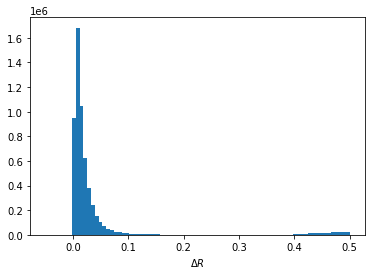

In [0]:

R_VEC = pairs.i0.delta_r(pairs.i1)
plt.hist(R_VEC.flatten(), bins=80, range=(-0.05,0.5))
plt.xlabel(r"$\Delta R$")

In [0]:
from scipy import optimize
#print(optimize.minimize(R_VEC.flatten(), x0=0.2))
R_mask_4V = (R_VEC < 0.25)
gen_matched = pairs.i0[R_mask_4V]
rec_matched = pairs.i1[R_mask_4V]

In [0]:
len(R_mask_4V), len(pairs.i0), len(gen_matched), len(gen_matched[gen_matched.counts >=1]), len(rec_matched[gen_matched.counts >=1]), 

(2413566, 2413566, 2413566, 2044879, 2044879)

In [0]:
gen_matched = gen_matched[gen_matched.counts > 1]
rec_matched = rec_matched[rec_matched.counts > 1]
# rec_matched
# gen_matched = gen_matched[gen_matched.counts == 3]
# rec_matched = rec_matched[rec_matched.counts == 3]
rec_matched

<JaggedArrayMethods [[PtEtaPhiMassLorentzVector(pt=112.42, eta=0.40757, phi=0.51733, mass=16.196) PtEtaPhiMassLorentzVector(pt=53.633, eta=-1.4433, phi=-2.5153, mass=10.745)] [PtEtaPhiMassLorentzVector(pt=121.26, eta=1.5352, phi=-1.3251, mass=15.256) PtEtaPhiMassLorentzVector(pt=120.14, eta=-1.0669, phi=1.6009, mass=12.73)] [PtEtaPhiMassLorentzVector(pt=253.25, eta=-0.55412, phi=1.4269, mass=26.085) PtEtaPhiMassLorentzVector(pt=233.21, eta=-0.63057, phi=-1.6538, mass=20.519)] ... [PtEtaPhiMassLorentzVector(pt=222.81, eta=-2.0704, phi=-1.3446, mass=25.187) PtEtaPhiMassLorentzVector(pt=178.06, eta=-2.9557, phi=1.4334, mass=28.338) PtEtaPhiMassLorentzVector(pt=61.106, eta=-0.47791, phi=-3.1118, mass=10.734)] [PtEtaPhiMassLorentzVector(pt=443.06, eta=-0.52893, phi=1.2682, mass=35.775) PtEtaPhiMassLorentzVector(pt=400.87, eta=-1.2418, phi=-2.1192, mass=45.646) PtEtaPhiMassLorentzVector(pt=45.533, eta=-1.6562, phi=-1.5072, mass=10.936)] [PtEtaPhiMassLorentzVector(pt=346.69, eta=1.7368, phi=1

In [0]:
len(R_mask_4V), len(pairs.i0), len(gen_matched), len(gen_matched[gen_matched.counts >=1]), len(rec_matched[gen_matched.counts >=1]), 

(2413566, 2413566, 1806613, 1806613, 1806613)

In [0]:

# rec_sorted = np.argsort( rec_matched.pt.any())
# #ge 

In [0]:
# rec_sorted = rec_matched.pt[rec_matched.pt.argsort()]
# gen_sorted = gen_matched.pt[gen_matched.pt.argsort()]

In [0]:
# rec_ordered = tinypt_r[np.argsort(- tinypt_r)]

ValueError: ignored

In [0]:
import numpy as np
some_list = [[1],[4],[3,4,7,0], [13,1,52,3], [9]]
flat_list = [item for sublist in some_list for item in sublist]

# which means:
# flat_list = []
# for sublist in l:
#     for item in sublist:
#         flat_list.append(item)
flat_list

[1, 4, 3, 4, 7, 0, 13, 1, 52, 3, 9]

In [0]:
gen_matched

NameError: ignored

In [0]:
def ptcut(gen_matched_pt, rec_matched_pt, minGeV):
  """Enter the min pt for the defined bins. Output: arrays of the gen jets and rec jets for that pt range
  The binning fot pt provided in the analysis note is [40, 60, 80, 140, 200, 260, 320, 400, 1500, 3500]"""
  if minGeV == 40:
    less_60_maskg = gen_matched.pt <= 60
    less_60_maskr = rec_matched.pt <= 60
    greater_40_maskg = gen_matched.pt >40
    greater_40_maskr = rec_matched.pt >40
    counts_ml = (less_60_maskg.counts == less_60_maskr.counts)
    counts_mg = (greater_40_maskg.counts == greater_40_maskr)
    return gen_matched.pt[less_60_maskg & greater_40_maskg], rec_matched.pt[less_60_maskr & greater_40_maskr]
  elif minGeV == 60:
      less_80_maskg = gen_matched.pt <= 80
      less_80_maskr = rec_matched.pt <= 80
      greater_60_maskg = gen_matched.pt >60
      greater_60_maskr = rec_matched.pt >60
      return gen_matched.pt[less_80_maskg & greater_60_maskg], rec_matched.pt[less_80_maskr & greater_60_maskr]
  elif minGeV == 80:
      less_140_maskg = gen_matched.pt <= 140
      less_140_maskr = rec_matched.pt <= 140
      greater_80_maskg = gen_matched.pt >80
      greater_80_maskr = rec_matched.pt >80
      return gen_matched.pt[less_140_maskg & greater_80_maskg], rec_matched.pt[less_140_maskr & greater_80_maskr]
  elif minGeV == 140:
      less_200_maskg = gen_matched.pt <= 200
      less_200_maskr = rec_matched.pt <= 200
      greater_140_maskg = gen_matched.pt >140
      greater_140_maskr = rec_matched.pt >140
      return gen_matched.pt[less_200_maskg & greater_140_maskg], rec_matched.pt[less_200_maskr & greater_140_maskr]
  elif minGeV == 200:
      less_260_maskg = gen_matched.pt <= 260
      less_260_maskr = rec_matched.pt <= 260
      greater_200_maskg = gen_matched.pt >200
      greater_200_maskr = rec_matched.pt >200
      return gen_matched.pt[less_260_maskg & greater_200_maskg], rec_matched.pt[less_260_maskr & greater_200_maskr]
  elif minGeV == 260:
      less_320_maskg = gen_matched.pt <= 320
      less_320_maskr = rec_matched.pt <= 320
      greater_260_maskg = gen_matched.pt >260
      greater_260_maskr = rec_matched.pt >260
      return gen_matched.pt[less_320_maskg & greater_260_maskg], rec_matched.pt[less_320_maskr & greater_260_maskr]
  elif minGeV == 320:
      less_400_maskg = gen_matched.pt <= 400
      less_400_maskr = rec_matched.pt <= 400
      greater_320_maskg = gen_matched.pt >320
      greater_320_maskr = rec_matched.pt >320
      return gen_matched.pt[less_400_maskg & greater_320_maskg], rec_matched.pt[less_400_maskr & greater_320_maskr]

  elif minGeV == 400:
      less_1500_maskg = gen_matched.pt <= 1500
      less_1500_maskr = rec_matched.pt <= 1500
      greater_400_maskg = gen_matched.pt >400
      greater_400_maskr = rec_matched.pt >400
      return gen_matched.pt[less_1500_maskg & greater_400_maskg], rec_matched.pt[less_1500_maskr & greater_400_maskr]

  elif minGeV == 1500:
      less_2000_maskg = gen_matched.pt <= 2000
      less_2000_maskr = rec_matched.pt <= 2000
      greater_1500_maskg = gen_matched.pt >1500
      greater_1500_maskr = rec_matched.pt >1500
      return gen_matched.pt[less_2000_maskg & greater_1500_maskg], rec_matched.pt[less_2000_maskr & greater_1500_maskr]


gen_pt_40, rec_pt_40 = ptcut(gen_matched.pt, rec_matched.pt, 40)
gen_pt_60, rec_pt_60 = ptcut(gen_matched.pt, rec_matched.pt, 60)
gen_pt_80, rec_pt_80 = ptcut(gen_matched.pt, rec_matched.pt, 80)
gen_pt_140, rec_pt_140 = ptcut(gen_matched.pt, rec_matched.pt, 140)
gen_pt_200, rec_pt_200 = ptcut(gen_matched.pt, rec_matched.pt, 200)
gen_pt_260, rec_pt_260 = ptcut(gen_matched.pt, rec_matched.pt, 260)
gen_pt_320, rec_pt_320 = ptcut(gen_matched.pt, rec_matched.pt, 320)
gen_pt_400, rec_pt_400 = ptcut(gen_matched.pt, rec_matched.pt, 400)
gen_pt_1500, rec_pt_1500 = ptcut(gen_matched.pt, rec_matched.pt, 1500)
#gen_pt_2000, rec_pt_2000 = ptcut(gen_matched.pt, rec_matched.pt, 2000)

In [0]:
gen_list = [gen_pt_40,gen_pt_60, gen_pt_80, gen_pt_140, gen_pt_140, gen_pt_200, gen_pt_260, gen_pt_320, gen_pt_400, gen_pt_1500]
rec_list = [rec_pt_40, rec_pt_60, rec_pt_80, rec_pt_140, rec_pt_200, rec_pt_260, rec_pt_320, rec_pt_400, rec_pt_1500]
import pandas as pd

df_bins = {'rec_pt_40':rec_pt_40, 'rec_pt_60' : rec_pt_60, 'rec_pt_80':rec_pt_80, 'rec_pt_140' : rec_pt_140, 'rec_pt_200': rec_pt_200, 'rec_pt_260': rec_pt_260, 'rec_pt_320': rec_pt_320, 'rec_pt_400':rec_pt_400, 'rec_pt_1500':rec_pt_1500}
rec_2_bins = pd.DataFrame(data=df_bins)
rec_2_bins.head(100)

,rec_pt_40,rec_pt_60,rec_pt_80,rec_pt_140,rec_pt_200,rec_pt_260,rec_pt_320,rec_pt_400,rec_pt_1500
0,[53.632893],[],[112.41561],[],[],[],[],[],[]
1,[],[],"[121.256424, 120.13538]",[],[],[],[],[],[]
2,[],[],[],[],"[253.25385, 233.20999]",[],[],[],[]
3,[],[],"[123.69235, 95.44822]",[],[],[],[],[],[]
4,[],[],"[119.81133, 99.59366]",[],[],[],[],"[406.5426, 410.78568]",[]
...,...,...,...,...,...,...,...,...,...
95,[],[74.929634],[],[140.2266],[],[],[],[],[]
96,[],[],[],[],"[250.44748, 235.71236]",[],[],[],[]
97,[],[62.055943],[],[],[],"[304.3964, 296.63696]",[],[],[]
98,[],[],[138.72992],[],[],[302.40894],[350.1041],[],[]


In [0]:
def rec_order_flip(rec_bin_list):
  rec_order = []

  for event in range(len(rec_bin_list)):
    event_order = list(np.argsort(- rec_bin_list[event]))
    rec_order.append(event_order)
    event +=1
    return rec_order
rec_140_def = rec_order_flip(rec_pt_140)
rec_140_def

[[]]

In [0]:
def flip_prob(rec_ordered_list):
  flipl = []
  for event in rec_ordered_list:
    if event[0] != 0:
      flipl.append(1)
  event +=1
  prob = len(flipl)/len(rec_ordered_list) * 100
  return prob
flip_prob(rec_140_def)

TypeError: ignored

In [0]:
# rec_pt_40 = rec_2_bins['rec_pt_40']
# rec_pt_140 = rec_2_bins['rec_pt_140']
rec_pt_40, rec_pt_60, rec_pt_80, rec_pt_140, rec_pt_200, rec_pt_260, rec_pt_320, rec_pt_400, rec_pt_1500 = rec_2_bins['rec_pt_40'], rec_2_bins['rec_pt_60'], rec_2_bins['rec_pt_80'], rec_2_bins['rec_pt_140'], rec_2_bins['rec_pt_200'], rec_2_bins['rec_pt_260'], rec_2_bins['rec_pt_320'], rec_2_bins['rec_pt_400'], rec_2_bins['rec_pt_1500'] 

In [0]:
rec_order_40 = []
for event in range(len(kk2)):
  event_order = list(np.argsort(- kk2[event]))
  rec_order_40.append(event_order)
  event +=1
rec_order_40

## Do them for all the bins

In [0]:
rec_order_40 = []
for event in range(len(rec_pt_40)):
  event_order_40 = list(np.argsort(- rec_pt_40[event]))
  rec_order_40.append(event_order_40)
  event +=1

rec_order_60 = []
for event in range(len(rec_pt_60)):
  event_order_60 = list(np.argsort(- rec_pt_60[event]))
  rec_order_60.append(event_order_60)
  event +=1

rec_order_80 = []
for event in range(len(rec_pt_80)):
  event_order_80 = list(np.argsort(- rec_pt_80[event]))
  rec_order_80.append(event_order_80)
  event +=1

rec_order_140 = []
for event in range(len(rec_pt_140)):
  event_order_140 = list(np.argsort(- rec_pt_140[event]))
  rec_order_140.append(event_order_140)
  event +=1

rec_order_200 = []
for event in range(len(rec_pt_200)):
  event_order_200 = list(np.argsort(- rec_pt_200[event]))
  rec_order_200.append(event_order_200)
  event +=1

rec_order_260 = []
for event in range(len(rec_pt_260)):
  event_order_260 = list(np.argsort(- rec_pt_260[event]))
  rec_order_260.append(event_order_260)
  event +=1


rec_order_320 = []
for event in range(len(rec_pt_320)):
  event_order_320 = list(np.argsort(- rec_pt_320[event]))
  rec_order_320.append(event_order_320)
  event +=1


rec_order_400 = []
for event in range(len(rec_pt_40)):
  event_order_400 = list(np.argsort(- rec_pt_400[event]))
  rec_order_400.append(event_order_400)
  event +=1

rec_order_1500 = []
for event in range(len(rec_pt_1500)):
  event_order_1500 = list(np.argsort(- rec_pt_1500[event]))
  rec_order_1500.append(event_order_1500)
  event +=1



In [0]:
rec_order_140 = []
for event in range(len(kk3)):
  event_order = list(np.argsort(- kk3[event]))
  rec_order_140.append(event_order)
  event +=1
rec_order_140

In [0]:
rec_order_40 = [x for x in rec_order_40 if x != []] # a lot of the events will clearly be empty for that pt range, so we take nonempty lists
rec_order_60 = [x for x in rec_order_60 if x != []]
rec_order_80 = [x for x in rec_order_80 if x != []]
rec_order_140 = [x for x in rec_order_140 if x != []]
rec_order_200 = [x for x in rec_order_200 if x != []]
rec_order_260 = [x for x in rec_order_260 if x != []]
rec_order_320 = [x for x in rec_order_320 if x != []]
rec_order_400 = [x for x in rec_order_400 if x != []]
rec_order_1500 = [x for x in rec_order_1500 if x != []]

In [0]:
flipl_40 =[]
for event in rec_order_40:
  if event[0] != 0:
    flipl_40.append(1)


flipl_60 =[]
for event in rec_order_60:
  if event[0] != 0:
    flipl_60.append(1)


flipl_80 =[]
for event in rec_order_80:
  if event[0] != 0:
    flipl_80.append(1)


flipl_140 =[]
for event in rec_order_140:
  if event[0] != 0:
    flipl_140.append(1)



In [0]:
flipl_200 =[]
for event in rec_order_200:
  if event[0] != 0:
    flipl_200.append(1)


flipl_260 =[]
for event in rec_order_260:
  if event[0] != 0:
    flipl_260.append(1)


flipl_320 =[]
for event in rec_order_320:
  if event[0] != 0:
    flipl_320.append(1)


flipl_400 =[]
for event in rec_order_400:
  if event[0] != 0:
    flipl_400.append(1)



flipl_1500 =[]
for event in rec_order_1500:
  if event[0] != 0:
    flipl_1500.append(1)





In [0]:
kk3_l = [] #just converting to list
for event in range(len(rec_pt_140)):
  listevent = list(kk3[event])
  kk3_l.append(listevent)
  event +=1
kk3_l

In [0]:
kk3_l =  [x for x in kk3_l if x != []]
kk3_l # this is length of nonempty events in this bin

In [0]:
len(flipl_140)/len(kk3_l) *100

6.269046582498912

In [0]:
len(flipl_140)/len(rec_order_140) *100   #giving us the same result! so we can do this for all bins... 6.269046582498912 for tiny

6.322914076268529

In [0]:
print("flipping probabilites are: {} {} {} {} {} {} {} {} {}".format(len(flipl_40)/len(rec_order_40) *100, len(flipl_60)/len(rec_order_60) *100, len(flipl_80)/len(rec_order_80) *100, len(flipl_140)/len(rec_order_140) *100, len(flipl_200)/len(rec_order_200) *100, len(flipl_260)/len(rec_order_260) *100, len(flipl_320)/len(rec_order_320) *100, len(flipl_400)/len(rec_order_400) *100, len(flipl_1500)/len(rec_order_1500) *100         ))

flipping probabilites are: 7.0985306556063295 6.2008060148167194 7.80440332940247 6.322914076268529 5.658557748599147 5.238605763542029 5.715319859422981 12.733574173377058 12.56076602013258


In [0]:
print("flipping probabilites errors are: {} {} {} {} {} {} {} {} {}".format(np.sqrt(len(flipl_40))/len(rec_order_40) *100, np.sqrt(len(flipl_60))/len(rec_order_60) *100, np.sqrt(len(flipl_80))/len(rec_order_80) *100, np.sqrt(len(flipl_140))/len(rec_order_140) *100, np.sqrt(len(flipl_200))/len(rec_order_200) *100, np.sqrt(len(flipl_260))/len(rec_order_260) *100, np.sqrt(len(flipl_320))/len(rec_order_320) *100, np.sqrt(len(flipl_400))/len(rec_order_400) *100, np.sqrt(len(flipl_1500))/len(rec_order_1500) *100         ))

flipping probabilites errors are: 0.036246254063469686 0.03374141761642115 0.02989205690947357 0.03375498916690805 0.0384562358332758 0.043340169796492016 0.047163232720354324 0.050260889061571286 0.2483509671770546


In [0]:
len(kk3_l), len(rec_order_140)

(4594, 4594)

[7.247665629168519,
 6.967657911873236,
 7.7752012003819395,
 6.269046582498912,
 4.937888198757764,
 4.676573426573427,
 6.020696142991533,
 12.843590367307225,
 16.94915254237288]

Text(0, 0.5, 'flipping probabilies')

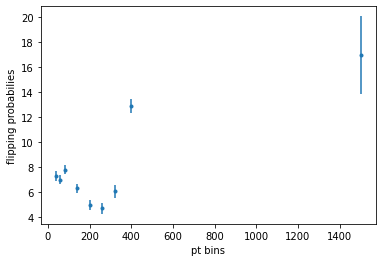

In [0]:
x = np.asarray([40,60,80,140,200,260, 320, 400, 1500])
y = np.asarray([len(flipl_40)/len(rec_order_40) *100, len(flipl_60)/len(rec_order_60) *100, len(flipl_80)/len(rec_order_80) *100, len(flipl_140)/len(rec_order_140) *100, len(flipl_200)/len(rec_order_200) *100, len(flipl_260)/len(rec_order_260) *100, len(flipl_320)/len(rec_order_320) *100, len(flipl_400)/len(rec_order_400) *100, len(flipl_1500)/len(rec_order_1500) *100])

err = np.asarray([np.sqrt(len(flipl_40))/len(rec_order_40) *100, np.sqrt(len(flipl_60))/len(rec_order_60) *100, np.sqrt(len(flipl_80))/len(rec_order_80) *100, np.sqrt(len(flipl_140))/len(rec_order_140) *100, np.sqrt(len(flipl_200))/len(rec_order_200) *100, np.sqrt(len(flipl_260))/len(rec_order_260) *100, np.sqrt(len(flipl_320))/len(rec_order_320) *100, np.sqrt(len(flipl_400))/len(rec_order_400) *100, np.sqrt(len(flipl_1500))/len(rec_order_1500) *100 ])

plt.errorbar(x, y, err, fmt='.')
plt.xlabel("pt bins")
plt.ylabel('flipping probabilies')

Text(0, 0.5, 'flipping probabilies')

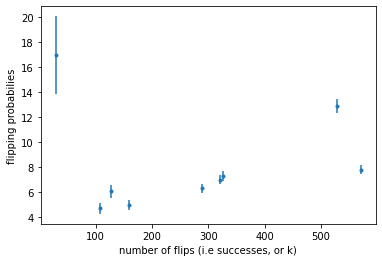

In [0]:
x = np.asarray([len(flipl_40),len(flipl_60),len(flipl_80),len(flipl_140),len(flipl_200),len(flipl_260), len(flipl_320), len(flipl_400), len(flipl_1500)])
y = np.asarray([len(flipl_40)/len(rec_order_40) *100, len(flipl_60)/len(rec_order_60) *100, len(flipl_80)/len(rec_order_80) *100, len(flipl_140)/len(rec_order_140) *100, len(flipl_200)/len(rec_order_200) *100, len(flipl_260)/len(rec_order_260) *100, len(flipl_320)/len(rec_order_320) *100, len(flipl_400)/len(rec_order_400) *100, len(flipl_1500)/len(rec_order_1500) *100])

err = np.asarray([np.sqrt(len(flipl_40))/len(rec_order_40) *100, np.sqrt(len(flipl_60))/len(rec_order_60) *100, np.sqrt(len(flipl_80))/len(rec_order_80) *100, np.sqrt(len(flipl_140))/len(rec_order_140) *100, np.sqrt(len(flipl_200))/len(rec_order_200) *100, np.sqrt(len(flipl_260))/len(rec_order_260) *100, np.sqrt(len(flipl_320))/len(rec_order_320) *100, np.sqrt(len(flipl_400))/len(rec_order_400) *100, np.sqrt(len(flipl_1500))/len(rec_order_1500) *100 ])

plt.errorbar(x, y, err, fmt='.')
plt.xlabel("number of flips (i.e successes, or k)")
plt.ylabel('flipping probabilies')

ValueError: ignored

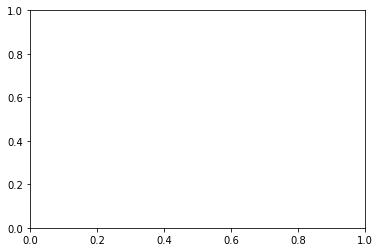

In [0]:
from scipy.stats import binom
n=len(rec_order_40)
p =len(flipl_40)

mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

In [0]:

import pandas as pd
d1_2 = {'g_pt':gen_matched.pt,'g_eta':gen_matched.eta,'g_phi':gen_matched.phi, 'Target': np.zeros(len(gen_matched.pt))}
gen_2 = pd.DataFrame(data=d1_2)
d2_2 = {'r_pt':rec_matched.pt,'r_eta':rec_matched.eta,'r_phi':rec_matched.phi, 'Target': np.ones(len(rec_matched.pt))}
rec_2 = pd.DataFrame(data=d2_2)
rec_2.head()

,r_pt,r_eta,r_phi,Target
0,"[112.41561, 53.632893]","[0.40757012, -1.4433419]","[0.51733214, -2.5153487]",1.0
1,"[121.256424, 120.13538]","[1.5352086, -1.0668906]","[-1.3250614, 1.6008844]",1.0
2,"[253.25385, 233.20999]","[-0.55411977, -0.63057166]","[1.426914, -1.6538477]",1.0
3,"[123.69235, 95.44822]","[0.5667756, -0.54535687]","[1.6817439, -1.4599955]",1.0
4,"[406.5426, 410.78568, 119.81133, 99.59366]","[1.5647848, 0.078979164, 0.7690975, 1.0881207]","[2.241232, -0.89358115, -0.6583826, 2.6040707]",1.0


In [0]:
kk=d1_2["g_pt"]
rr = d2_2["r_pt"]

In [0]:
gen_order=[]
for event in range(len(kk)):
  event_order = list(np.argsort(- kk[event]))
  gen_order.append(event_order)
  event +=1

In [0]:
gen_order # a good summary is that np.argsort or argmax does not work on jagged arrays, however, it does work when looping on jagged 
#jagged arrays since esach event is a list

In [0]:
rec_order=[]
for event in range(len(rr)):
  event_order_r = list(np.argsort(- rr[event]))
  rec_order.append(event_order_r)
  event +=1

In [0]:
rec_order

## probability in event-by-event basis

In [0]:
# for each event, if the first jet is not the jet with the highest pt, append 1 to the list of "flipping events"
flipl=[]
for event in rec_order:
  if event[0] != 0:
    flipl.append(1)


In [0]:
len(rec_order), len(flipl), 
print("the flipping probability of the highest pt jet in rec jets (i.e. the number of times that the highest pt jet is not in the first slot is: ", len(flipl)/len(rec_order))

the flipping probability of the highest pt jet in rec jets (i.e. the number of times that the highest pt jet is not in the first slot is:  0.1537874074476832


In [0]:
rr.tolist()[4]

[406.5426025390625, 410.7856750488281, 119.81133270263672, 99.59365844726562]

In [0]:
gen_order_jagged[4]

array([0, 1, 2, 3])

In [0]:
gen_order_jagged=ak.fromiter(gen_order)
rr[gen_order_jagged][4]

array([406.5426 , 410.78568, 119.81133,  99.59366], dtype=float32)

In [0]:

gen_order

[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1, 2, 3]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1, 2]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([0, 1]),
 array([0]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1]),
 array([0, 1]),
 array([0]),
 array([0, 1, 2]),
 array([0, 1]),
 array([0, 1, 2]),
 array([0, 1]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1]),
 array([0, 1, 2]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1, 2]),

In [0]:
kl_2.columns = ["pt", "eta", "phi", "Target"]
#kl_t[21834306:21834310] #here is where gen changes to rec
#kl_2_final = kl_2.sample(frac=1).reset_index(drop=True)
kl_2_final = kl_2
kl_2

NameError: ignored

In [0]:
import awkward as ak
a = ak.fromiter(kl_2)
df = ak.topandas(a, flatten=False)
df

0        pt
1       eta
2       phi
3    Target
dtype: awkward

In [0]:
from scipy.stats import zscore
scaler  = StandardScaler()
#scaler.fit(kl_2["pt"])
ptmean = np.mean(kl_2["pt"].flatten())

AttributeError: ignored

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(np.array(kl_2_final),object)

ValueError: ignored

In [0]:
from scipy.stats import zscore
kl_2_final["pt"] = zscore(kl_2_final["pt"])
kl_2_final["eta"] = zscore(kl_2_final["eta"])
kl_2_final["phi"] = zscore(kl_2_final["phi"])
kl_2_final

NameError: ignored

In [0]:
from sklearn.model_selection import train_test_split
train_df2, test_df2 = train_test_split(kl_2_final, test_size=0.2, shuffle=True)

train_y_df2 = train_df2.Target
test_y_df2 = test_df2.Target
print("training targets: ", train_y_df2.head(), "testing targets: ", test_y_df2.head())

training targets:  16147465    1.0
7893285     0.0
16307460    1.0
13612231    1.0
17804152    1.0
Name: Target, dtype: float64 testing targets:  15821372    1.0
16468254    1.0
17081398    1.0
12772499    1.0
3157209     0.0
Name: Target, dtype: float64


In [0]:
train_x_df2 = train_df2[["pt", "eta", "phi"]]
test_x_df2 = test_df2[["pt", "eta", "phi"]]
print("training data: ", train_x_df2.head(), "testing data", test_x_df2.head())


training data:                  pt       eta       phi
16147465  0.916656 -0.275281  0.089595
7893285   2.234483 -0.166803 -0.120416
16307460 -0.372647 -0.359560  1.538359
13612231 -0.349315 -1.530136  0.438931
17804152  0.120955  0.051915 -0.171761 testing data                 pt       eta       phi
15821372  0.257889  1.543315 -1.058260
16468254 -0.487503 -0.627251 -1.643881
17081398 -0.116564 -1.119826 -0.427323
12772499 -0.348870 -1.545228  1.711443
3157209  -0.629160 -1.306092 -0.070541


## Here

In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, CuDNNLSTM
from keras.layers import Embedding
from keras.layers import GRU
from keras.callbacks import EarlyStopping

In [0]:
import pandas as pd
d1_2_order ={'g_pt_order':gen_order,'g_eta':gen_matched.eta, 'Target': np.zeros(len(gen_order))}
gen_2_order = pd.DataFrame(data=d1_2_order)
d2_2_order ={'r_ptorder':rec_order,'r_eta':rec_matched.eta, 'Target': np.ones(len(rec_order))}
rec_2_order = pd.DataFrame(data=d2_2_order)
rec_2_order.head()

NameError: ignored

In [0]:
r = rec_sorted
g= gen_sorted

In [0]:
import pandas as pd
d1_2_order ={'g_pt_order': g, 'Target': np.zeros(len(gen_sorted))}
gen_2_order = pd.DataFrame(data=d1_2_order)
d2_2_order ={'r_ptorder': r,'Target': np.ones(len(rec_sorted))}
rec_2_order = pd.DataFrame(data=d2_2_order)
rec_2_order.head()

,r_ptorder,Target
0,"[228.00363, 203.0757, 56.99478]",1.0
1,"[104.07147, 68.664246, 66.245026]",1.0
2,"[123.06193, 89.984245, 46.26375]",1.0
3,"[154.72932, 119.78563, 101.61238]",1.0
4,"[198.40178, 155.59593, 44.195312]",1.0


In [0]:
sl_2_order = np.concatenate((gen_2_order,rec_2_order))
kl_2_order = pd.DataFrame(sl_2_order)


In [0]:
kl_2_order.columns = ["pt", "Target"]
#kl_t[21834306:21834310] #here is where gen changes to rec
#kl_2_final = kl_2.sample(frac=1).reset_index(drop=True)
kl_2_final = kl_2_order
kl_2_final

,pt,Target
0,"[266.27475, 221.19942, 67.371635]",0
1,"[88.84725, 69.667465, 61.54047]",0
2,"[133.72725, 99.35083, 58.404396]",0
3,"[156.86055, 141.24367, 112.18314]",0
4,"[196.69061, 187.26602, 51.457775]",0
...,...,...
427369,"[560.45215, 405.17447, 124.12644]",1
427370,"[139.15634, 109.780014, 64.04927]",1
427371,"[142.75522, 138.53389, 117.197395]",1
427372,"[1822.0026, 1658.026, 134.22263]",1


In [0]:
data = kl_2_final["pt"]
targets = kl_2_final["Target"]
type(data)

pandas.core.series.Series

In [0]:
data[1]

array([88.84725 , 69.667465, 61.54047 ], dtype=float32)

In [0]:
for i in range(len(data)):
  data[i] = data[i].tolist()

In [0]:
event_list=[]
for event in range(len(data)):
  for jet in range(len(data[event].tolist())):
    event_list.append(data[event][jet]) 
    jet +=1
    event +=1
    
event_list

KeyError: ignored

In [0]:
#data= data.tostring()
data.tolist()

AttributeError: ignored

In [0]:
for i in range(len(data)):
  data[i] = data[i].flatten()
# for line in data:
#     Type = line.split(",")
#     x = Type[1]
#     y = Type[2]
#     print(x,y)
data

KeyboardInterrupt: ignored

In [0]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  
        
        
# Driver code     
#s = data
#print(listToString(s))  


In [0]:
x.shape

(427374,)

In [0]:
xn = np.array(x)
xn.reshape(-1,1)
yn = np.array(y)
yn.reshape(-1,1)

array([[0.0],
       [0.0],
       [0.0],
       ...,
       [1.0],
       [1.0],
       [1.0]], dtype=object)

In [0]:
xn.shape

(427374,)

In [0]:
model = Sequential()
model.add(CuDNNLSTM(128, input_shape = 1))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))

model.add(Dense(1, activation-'softmax'))
opt = keras.optimizers.Adam(lr=0.01, decay=1e-5)
model.compile(loss='sparse_binary_crossentropy', optimizer=opt, metrtics='accuracy')

TypeError: ignored

In [0]:
max_features = 2 # 0,1,2,3 (total of 4)
x = kl_2_final[["pt", "eta"]]
x = np.array(x)

y = np.array(kl_2_final["Target"], dtype=np.int32)

# Convert y2 to dummy variables
y2 = np.zeros((y.shape[0], max_features),dtype=np.float32)
y2[np.arange(y.shape[0]), y] = 1.0